1. **[Association Rule Generation from Transaction Data]**
-  **Download transaction dataset to your local drive.**
   - Go to the following Google Drive link (Students must be logged in to their Rowan accounts):
   [Google Drive Link](https://drive.google.com/drive/folders/1LuFEbgq3IvisEXT1jOZ-H4jWeqzqEH3m?usp=sharing)
-  **Download the ’Grocery Items {DATASET NUMBER}.csv’ file from the Google Drive Link.**
   - `DATASET NUMBER` = `50` is the number assigned to you earlier in the semester.
-  **Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association rules you can extract from your dataset?** (0.5 point)
   - (Refer to [mlxtend documentation](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) for guidance).
-  **Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct): 0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from the dataset.**
   - Construct a heatmap using Seaborn data visualization library ([Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)) to show the count results such that the x-axis is msv and the y-axis is mct. (2.5 points)
-  **Split the dataset into 50:50 (i.e., 2 equal subsets) and extract association rules for each data subset for minimum support = 0.005 and minimum confident threshold = 0.075.**
   - Show the association rules for both sets. Which association rules appeared in both sets (note that there could be none)? (1 point)


In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns


def load_dataset(dataset_path):
    dataset = pd.read_csv(dataset_path, header=None)
    transactions = []
    for index, row in dataset.iterrows():
        transaction = [str(item) for item in row if pd.notnull(item)]
        transactions.append(transaction)
    return transactions


def encode_transactions(transactions):
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    return df


def generate_association_rules(df, min_support_values, min_confidence_thresholds):
    results = []
    for min_confidence in min_confidence_thresholds:
        row = []
        for min_support in min_support_values:
            frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
            rules = association_rules(
                frequent_itemsets, metric="confidence", min_threshold=min_confidence
            )
            row.append(len(rules))
        results.append(row)
    return results


def plot_association_rules(results, min_support_values, min_confidence_thresholds):
    results_df = pd.DataFrame(
        results, columns=min_support_values, index=min_confidence_thresholds
    )
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        results_df,
        annot=True,
        fmt="d",
        cmap="BuPu",
        cbar_kws={"label": "Number of Rules"},
    )
    plt.xlabel("Minimum Support Value")
    plt.ylabel("Minimum Confidence Threshold")
    plt.title("Number of Association Rules")
    plt.show()


def split_transactions(transactions):
    half = len(transactions) // 2
    subset1, subset2 = transactions[:half], transactions[half:]
    return subset1, subset2


def transactions_to_df(subset, te):
    te_ary = te.transform(subset)
    return pd.DataFrame(te_ary, columns=te.columns_)


def generate_rules_for_subset(df):
    frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
    return association_rules(
        frequent_itemsets, metric="confidence", min_threshold=0.075
    )


def find_common_rules(rules_subset1, rules_subset2):
    common_rules = pd.merge(
        rules_subset1, rules_subset2, on=["antecedents", "consequents"], how="inner"
    )
    common_rules["antecedents"] = common_rules["antecedents"].apply(
        lambda x: ", ".join(list(x))
    )
    common_rules["consequents"] = common_rules["consequents"].apply(
        lambda x: ", ".join(list(x))
    )
    return common_rules

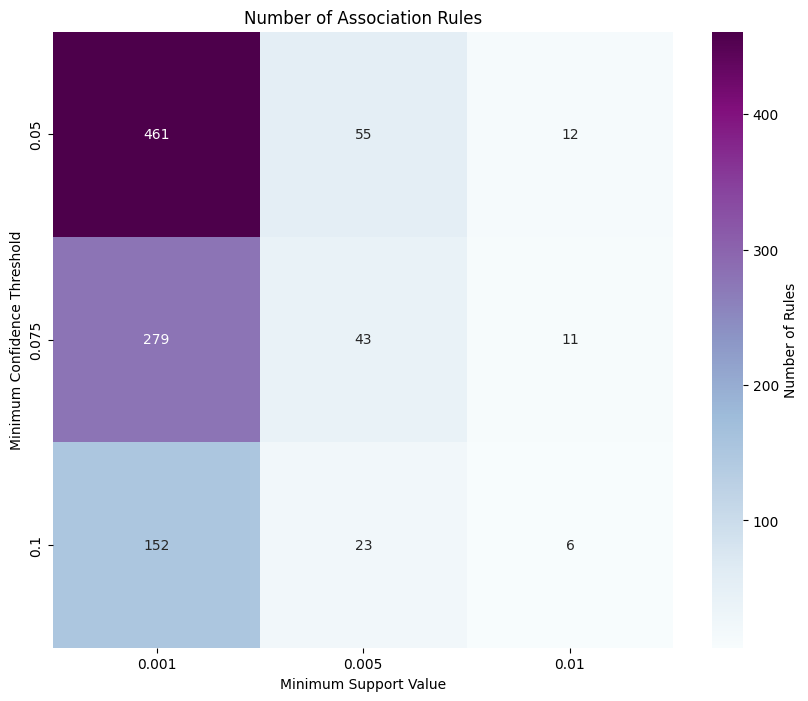

Rules for Subset 1:
             antecedents         consequents  antecedent support  \
0         (bottled beer)  (other vegetables)             0.04550   
1              (sausage)      (bottled beer)             0.06275   
2         (bottled beer)           (sausage)             0.04550   
3         (bottled beer)        (whole milk)             0.04550   
4        (bottled water)  (other vegetables)             0.06125   
5        (bottled water)        (rolls/buns)             0.06125   
6        (bottled water)        (whole milk)             0.06125   
7          (brown bread)        (whole milk)             0.03775   
8               (butter)        (whole milk)             0.03525   
9          (canned beer)        (whole milk)             0.04725   
10        (citrus fruit)  (other vegetables)             0.05525   
11        (citrus fruit)        (rolls/buns)             0.05525   
12        (citrus fruit)        (whole milk)             0.05525   
13        (citrus fruit)    

In [2]:
dataset_path = "Grocery_Items_50.csv"
transactions = load_dataset(dataset_path)
df = encode_transactions(transactions)

min_support_values = [0.001, 0.005, 0.01]
min_confidence_thresholds = [0.05, 0.075, 0.1]
results = generate_association_rules(df, min_support_values, min_confidence_thresholds)
plot_association_rules(results, min_support_values, min_confidence_thresholds)

subset1, subset2 = split_transactions(transactions)
te = TransactionEncoder()
te.fit(transactions)
df_subset1 = transactions_to_df(subset1, te)
df_subset2 = transactions_to_df(subset2, te)

rules_subset1 = generate_rules_for_subset(df_subset1)
rules_subset2 = generate_rules_for_subset(df_subset2)

print("Rules for Subset 1:")
print(rules_subset1)
print("\nRules for Subset 2:")
print(rules_subset2)

In [3]:
def print_common_rules(rules_subset1, rules_subset2):
    common_rules = rules_subset1.merge(rules_subset2, on=["antecedents", "consequents"])

    print("\nAssociation Rules that appeared in both sets:")
    if common_rules.empty:
        print("No common association rules found.")
    else:
        common_rules["rule"] = common_rules.apply(
            lambda row: f"({', '.join(list(row['antecedents']))}) => ({', '.join(list(row['consequents']))})",
            axis=1,
        )
        print("\n".join(common_rules["rule"].tolist()))

In [4]:
print_common_rules(rules_subset1, rules_subset2)


Association Rules that appeared in both sets:
(bottled beer) => (whole milk)
(bottled water) => (whole milk)
(butter) => (whole milk)
(citrus fruit) => (whole milk)
(citrus fruit) => (yogurt)
(domestic eggs) => (whole milk)
(newspapers) => (whole milk)
(rolls/buns) => (other vegetables)
(other vegetables) => (rolls/buns)
(soda) => (other vegetables)
(tropical fruit) => (other vegetables)
(whole milk) => (other vegetables)
(other vegetables) => (whole milk)
(yogurt) => (other vegetables)
(pork) => (whole milk)
(soda) => (rolls/buns)
(tropical fruit) => (rolls/buns)
(rolls/buns) => (whole milk)
(whole milk) => (rolls/buns)
(yogurt) => (rolls/buns)
(root vegetables) => (whole milk)
(sausage) => (soda)
(sausage) => (whole milk)
(sausage) => (yogurt)
(shopping bags) => (whole milk)
(tropical fruit) => (soda)
(soda) => (whole milk)
(tropical fruit) => (whole milk)
(yogurt) => (whole milk)


## Image Classification using CNN
Construct a 4-class classification model using a convolutional neural network with the following simple architecture (2 point)

1. 1 Convolutional Layer with 8 3 x 3 filters.
2. 1 max pooling with 2 x 2 pool size
3. Flatten the Tensor
4. 1 hidden layer with 16 nodes for fully connected neural network
5. Output layer has 4 nodes (since 4 classes) using ‘softmax’ activation function.

(Use ‘ReLU’ for all layers except the output layer.) for 20 epochs using ‘adam’ optimizer and ‘categorical cross entropy’ loss function. If your machine is too slow, you can reduce to 5 epochs. You can perform more epochs (> 20) if you want to. For validation split, you will use 20%. For batch size, you can pick a size that will not slow down the training process on your machine. (see https://keras.io/examples/vision/mnist_convnet/)

- Plot a graph to show the learning curves (i.e., x-axis: number of epochs; y-axis: training and validation accuracy - 2 curves) (1 points)
- Perform ONE of the following experiment below ((a), (b) or (c)) based on the last digit of your Rowan Banner ID (1 point):
  - (a) Train the CNN using 2 other filter sizes: 5 x 5 and 7 x 7 for the convolution layer (i) with all other parameters unchanged
  - (b) Train the CNN using 2 other number of filters: 4 and 16 for the convolution layer (i) with all other parameters unchanged
  - (c) Train the CNN using 2 other number of nodes in the hidden layer (iv): 8 and 32 with all other parameters unchanged

If the last digit is {0,1,2,3}, do (a). If the last digit is {4,5,6}, do (b). If the last digit is {7,8,9}, do (c). 

State your Rowan Banner ID in your submission so that we know which experiment you are doing.

- Plot the learning curves (i.e., x-axis: number of epochs; y-axis: training and validation accuracy - 2 curves) for the classification models using the above 2 different parameter values (1 points)
- Describe and discuss what you observe by comparing the performance of the first model and the other two models you constructed in (a), (b) or (c) (depending on which one you did). Are there model overfit or underfit or just right? (1 point)

## *Rowan ID*: 916463975 

In [20]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

np.random.seed(123)
tf.random.set_seed(123)

In [23]:
def load_data(data_dir):
    data = []
    labels = []
    label_names = os.listdir(data_dir)
    label_map = {name: i for i, name in enumerate(label_names)}

    for folder_name in label_names:
        folder_path = os.path.join(data_dir, folder_name)
        for file_name in os.listdir(folder_path):
            if file_name.endswith(".npy"):
                file_path = os.path.join(folder_path, file_name)
                histogram = np.load(file_path)
                data.append(histogram)
                labels.append(label_map[folder_name])

    data = np.array(data).reshape((-1, data[0].shape[0], data[0].shape[1], 1))
    labels = np.array(labels)
    labels = tf.keras.utils.to_categorical(labels, 4)
    return data, labels


data_dir = "EdgeHistograms"
data, labels = load_data(data_dir)

In [24]:
def split_data(data, labels, test_size=0.2, random_state=123):
    return train_test_split(
        data, labels, test_size=test_size, random_state=random_state
    )


train_data, val_data, train_labels, val_labels = split_data(data, labels)

In [25]:
def create_model(input_shape, filters, hidden_nodes=16):
    model = models.Sequential(
        [
            layers.Conv2D(filters, (3, 3), activation="relu", input_shape=input_shape),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(hidden_nodes, activation="relu"),
            layers.Dense(4, activation="softmax"),
        ]
    )
    return model

In [26]:
def train_model(
    model, train_data, train_labels, val_data, val_labels, epochs, batch_size
):
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    history = model.fit(
        train_data,
        train_labels,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(val_data, val_labels),
    )
    return history

In [27]:
def plot_validation(histories):
    for filters, history in histories:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history["accuracy"], label="Training Accuracy")
        plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
        plt.title(f"Model with {filters} Filters: Training and Validation Accuracy")
        plt.xlabel("Number of Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

Epoch 1/20


2024-04-05 19:35:39.645600: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


9/9 [==============================] - 1s 61ms/step - loss: 70.6533 - accuracy: 0.2628 - val_loss: 8.7112 - val_accuracy: 0.1972
Epoch 2/20
9/9 [==============================] - 0s 19ms/step - loss: 1.8811 - accuracy: 0.2522 - val_loss: 1.3865 - val_accuracy: 0.1972
Epoch 3/20
9/9 [==============================] - 0s 21ms/step - loss: 1.3860 - accuracy: 0.2363 - val_loss: 1.3866 - val_accuracy: 0.1972
Epoch 4/20
9/9 [==============================] - 0s 19ms/step - loss: 1.3859 - accuracy: 0.2734 - val_loss: 1.3868 - val_accuracy: 0.1972
Epoch 5/20
9/9 [==============================] - 0s 19ms/step - loss: 1.3857 - accuracy: 0.3086 - val_loss: 1.3870 - val_accuracy: 0.1972
Epoch 6/20
9/9 [==============================] - 0s 20ms/step - loss: 1.3855 - accuracy: 0.3086 - val_loss: 1.3872 - val_accuracy: 0.1972
Epoch 7/20
9/9 [==============================] - 0s 21ms/step - loss: 1.3853 - accuracy: 0.3086 - val_loss: 1.3875 - val_accuracy: 0.1972
Epoch 8/20
9/9 [=====================

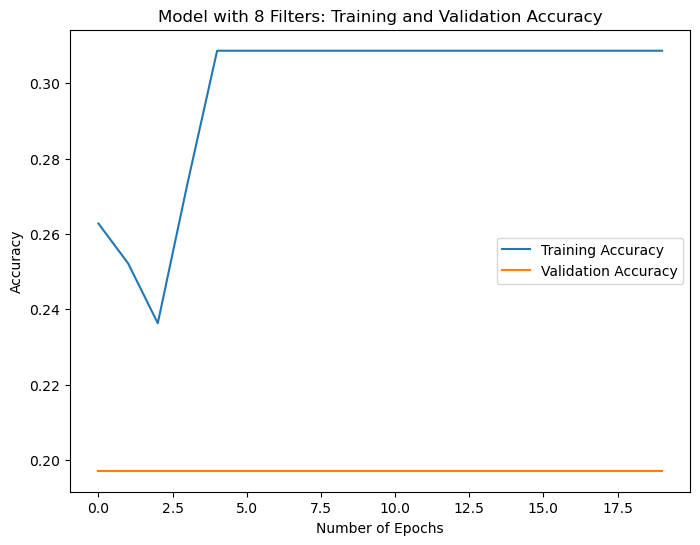

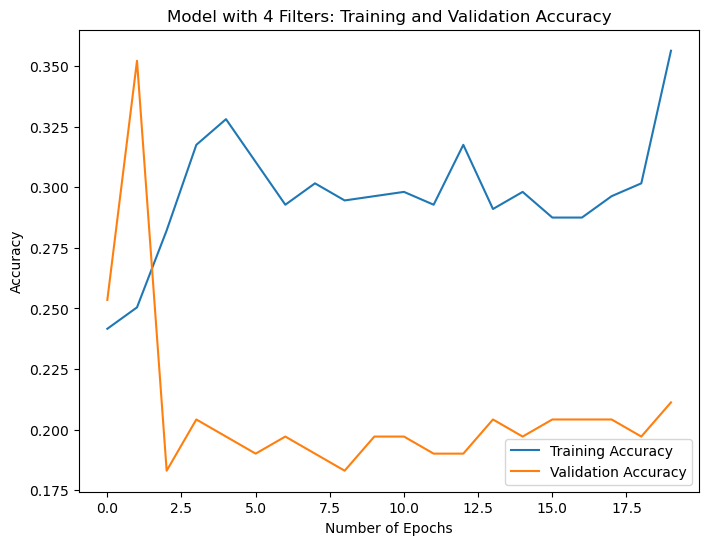

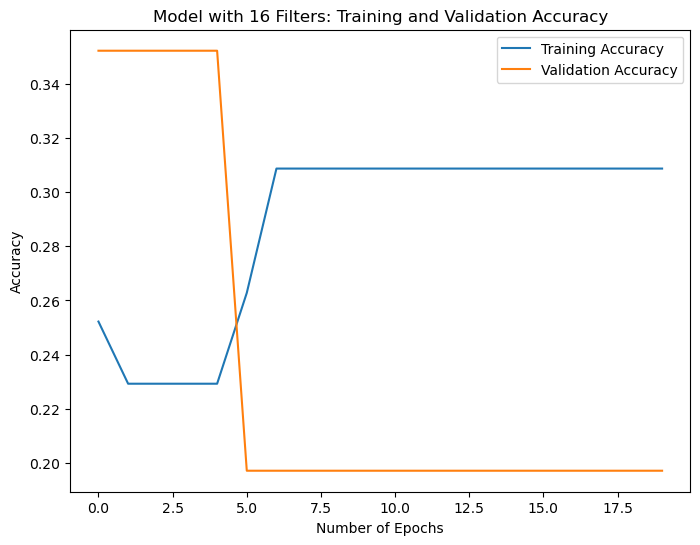

In [31]:
epochs = 20
batch_size = 64
filter_sizes = [8, 4, 16]

histories = []

for filters in filter_sizes:
    model = create_model((data.shape[1], data.shape[2], 1), filters)
    history = train_model(
        model, train_data, train_labels, val_data, val_labels, epochs, batch_size
    )
    histories.append((filters, history))

plot_validation(histories)

### Model with 8 Filters
The training accuracy for the model with 8 filters shows a drop at the beginning but then stabilizes. The validation accuracy remains flat and close to the baseline, indicating that the model is not improving its performance on the unseen data.

### Model with 4 Filters
The model with 4 filters shows more volatility in the training accuracy, with several peaks and troughs. This could be due to the smaller capacity of the model struggling to learn from the data, which is often a sign of underfitting. The validation accuracy remains consistently low, further supporting this conclusion.

### Model with 16 Filters
Similar to the model with 8 filters, the model with 16 filters shows a more stable training accuracy after an initial drop. The validation accuracy, while slightly higher than that of the other two models, remains quite low and flat.

### Discussion
All three models demonstrate a clear gap between training and validation accuracies, but the gap is not increasing with more epochs, which would typically indicate overfitting. Instead, the models fail to achieve a high accuracy on either the training or validation sets, which is a classic sign of underfitting.